In [3]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D , Flatten , Dropout ,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.src.utils.np_utils import to_categorical

In [1]:
label_names=['ambulance','apple','bear','bicycle','bird','bus','cat','foot','owl','pig']
def get_data(data_dir):
    data = [] 
    for label in label_names: 
        path = os.path.join(data_dir, label)
        class_num = label_names.index(label)
        for npy in os.listdir(path):
            npy_arr = np.load(os.path.join(path,npy))
            for i in range(npy_arr.shape[0]):
                arr = npy_arr[i,:].reshape(28, 28) # Reshaping images to preferred size
                data.append([arr, class_num])
    return data

In [4]:
data_all=get_data("data2/")
data_load=[]
data_label=[]
for train,label in data_all:
    data_load.append(train)
    data_label.append(label)
data_load=np.array(data_load)
data_label=np.array(data_label)
X_train, X_test, y_train, y_test = train_test_split(data_load, data_label, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
datagen = ImageDataGenerator(rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [11]:
model = Sequential()
model.add(Conv2D(16, (3, 3),padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
opt = Adam(lr=0.00001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
2500/2500 [==============================] - 51s 20ms/step - loss: 0.9203 - accuracy: 0.6868 - val_loss: 0.5756 - val_accuracy: 0.8065
Epoch 2/50
2500/2500 [==============================] - 49s 20ms/step - loss: 0.6320 - accuracy: 0.7876 - val_loss: 0.4850 - val_accuracy: 0.8389
Epoch 3/50
2500/2500 [==============================] - 49s 20ms/step - loss: 0.5475 - accuracy: 0.8170 - val_loss: 0.4345 - val_accuracy: 0.8576
Epoch 4/50
2500/2500 [==============================] - 49s 20ms/step - loss: 0.5026 - accuracy: 0.8322 - val_loss: 0.4550 - val_accuracy: 0.8534
Epoch 5/50
2500/2500 [==============================] - 48s 19ms/step - loss: 0.4716 - accuracy: 0.8425 - val_loss: 0.3957 - val_accuracy: 0.8716
Epoch 6/50
2500/2500 [==============================] - 42s 17ms/step - loss: 0.4507 - accuracy: 0.8502 - val_loss: 0.3974 - val_accuracy: 0.8712
Epoch 7/50
2500/2500 [==============================] - 44s 17ms/step - loss: 0.4357 - accuracy: 0.8555 - val_loss: 0.3814 -

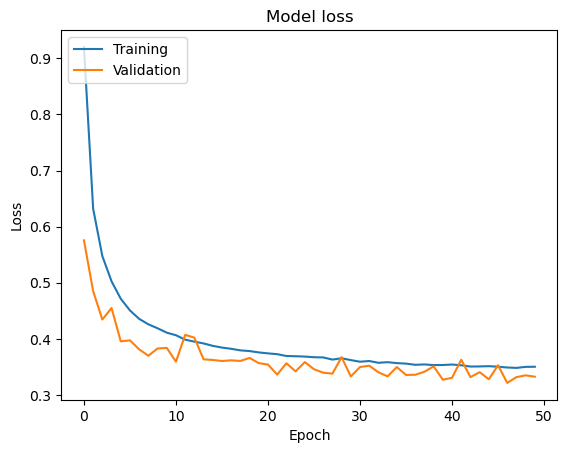

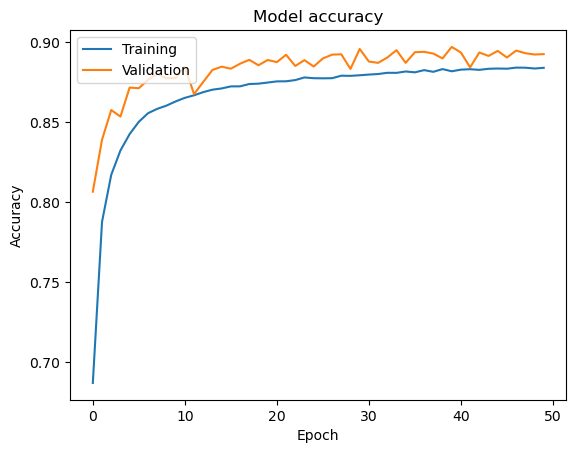

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


4/4 [==============================] - 0s 4ms/step


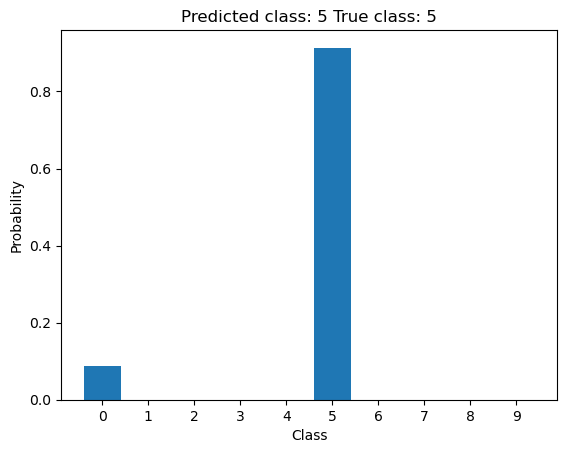

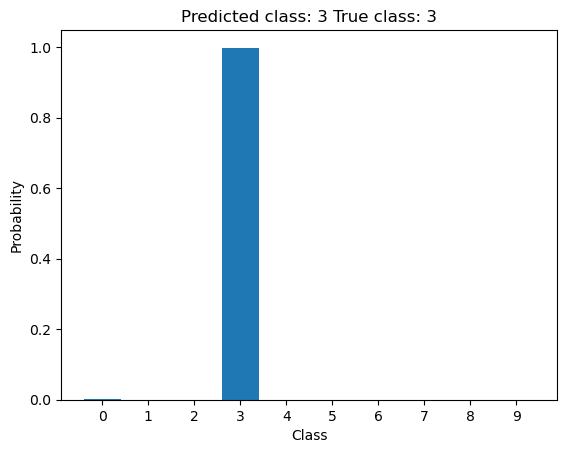

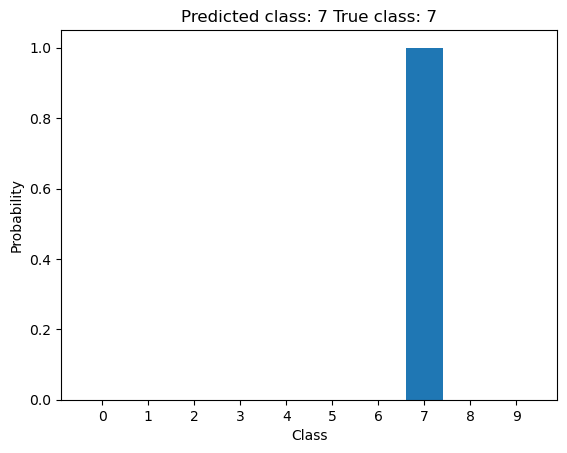

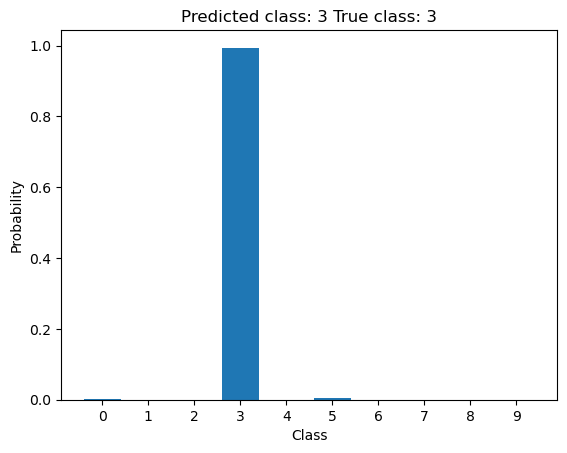

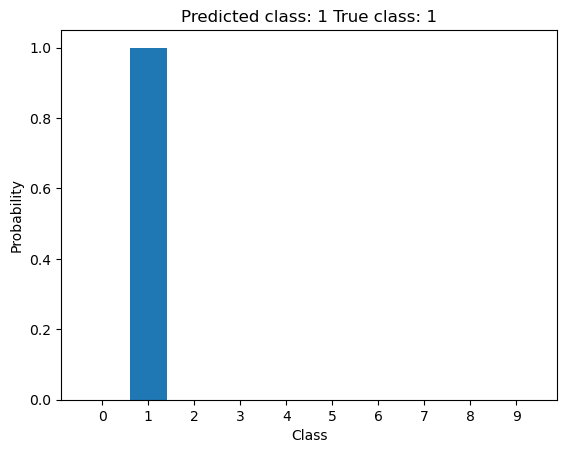

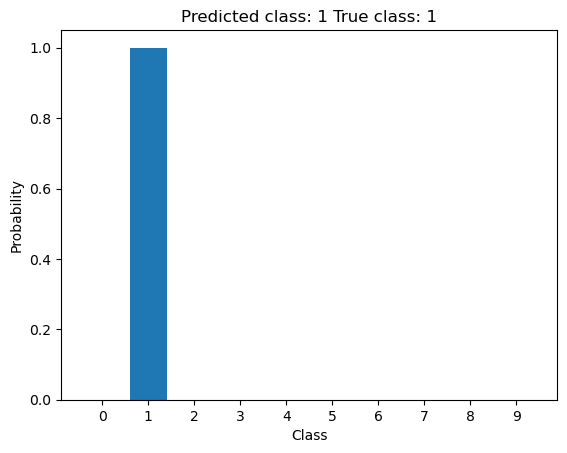

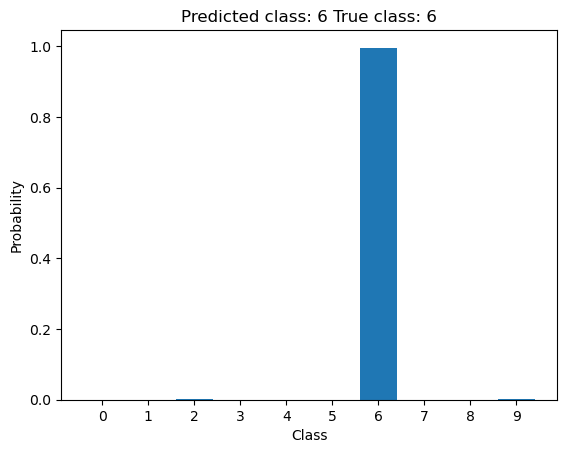

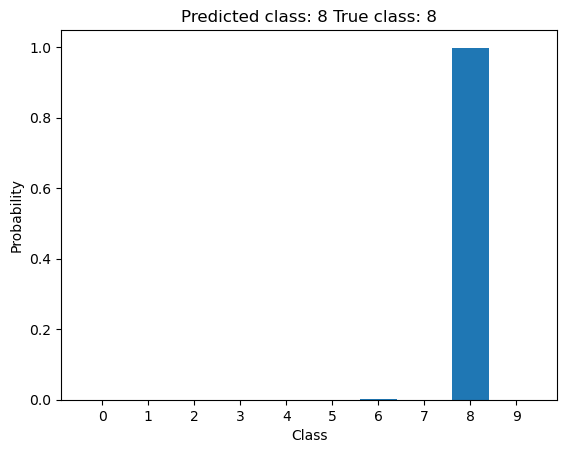

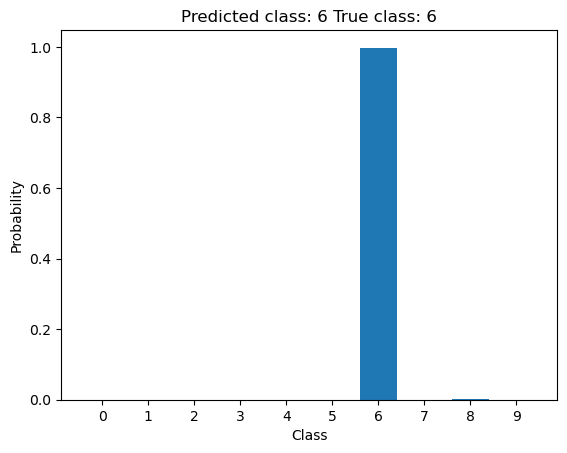

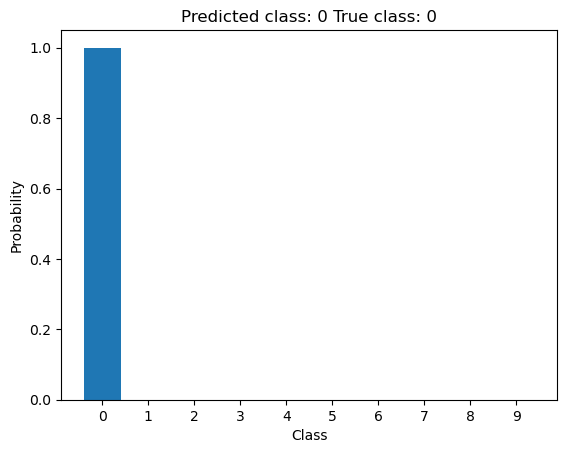

In [14]:
X_test_sample = X_test[:100]
y_test_sample = y_test[:100]

y_pred = model.predict(X_test_sample)

for i in range(10):
    plt.figure()
    plt.bar(np.arange(10), y_pred[i])
    plt.xticks(np.arange(10), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title(f'Predicted class: {np.argmax(y_pred[i])} True class: {np.argmax(y_test_sample[i])}')
    plt.show()

In [15]:
model.save('cnn.h5')

d:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
